### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [11]:
import pandas as pd

m_df = pd.read_csv('./datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [12]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [13]:
m_df.duplicated().sum()

47

In [14]:
m_df = m_df.drop_duplicates()
m_df = m_df.reset_index(drop=True)

In [15]:
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [16]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1295 non-null   object 
 1   mosquito_Indicator  1295 non-null   float64
 2   rain(mm)            1295 non-null   float64
 3   mean_T(℃)           1295 non-null   float64
 4   min_T(℃)            1295 non-null   float64
 5   max_T(℃)            1295 non-null   float64
dtypes: float64(5), object(1)
memory usage: 60.8+ KB


In [17]:
pre_m_df = m_df.copy()

In [19]:
pre_m_df.loc[:,'date'] = pd.to_datetime(pre_m_df.date, dayfirst=True, format='mixed')
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01 00:00:00,254.4,0.0,18.8,12.2,26.0
1,2016-05-02 00:00:00,273.5,16.5,21.1,16.5,28.4
2,2016-05-03 00:00:00,304.0,27.0,12.9,8.9,17.6
3,2016-05-04 00:00:00,256.2,0.0,15.7,10.2,20.6
4,2016-05-05 00:00:00,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27 00:00:00,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28 00:00:00,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29 00:00:00,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30 00:00:00,5.5,0.4,2.7,-5.7,6.8


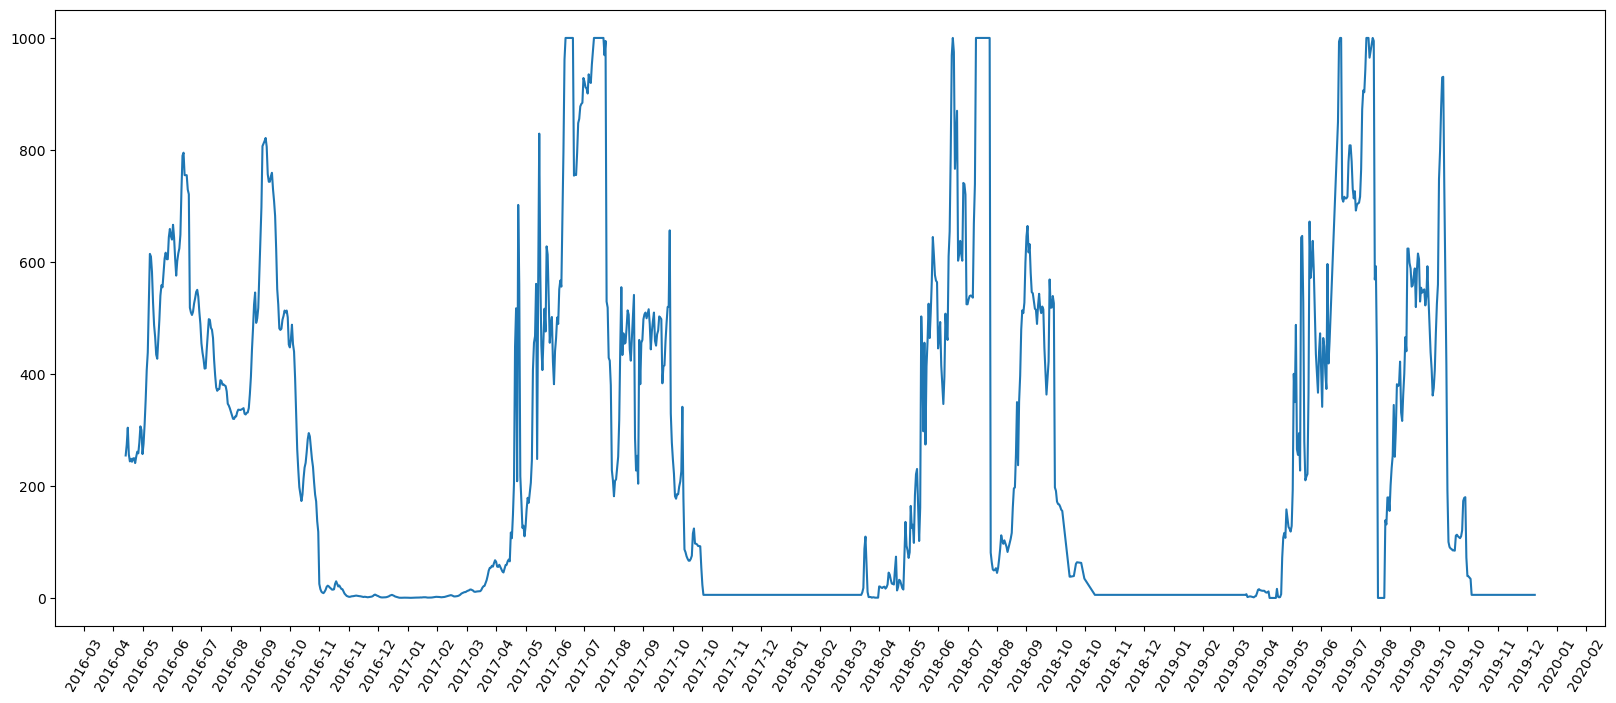

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

date_format = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(date_format)
ax.plot(pre_m_df['date'], pre_m_df['mosquito_Indicator'])
plt.xticks(rotation=60)
plt.show()

In [22]:
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01 00:00:00,254.4,0.0,18.8,12.2,26.0
1,2016-05-02 00:00:00,273.5,16.5,21.1,16.5,28.4
2,2016-05-03 00:00:00,304.0,27.0,12.9,8.9,17.6
3,2016-05-04 00:00:00,256.2,0.0,15.7,10.2,20.6
4,2016-05-05 00:00:00,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27 00:00:00,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28 00:00:00,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29 00:00:00,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30 00:00:00,5.5,0.4,2.7,-5.7,6.8


In [23]:
pre_m_df = pre_m_df.iloc[:, 1:]
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1290,5.5,0.0,-1.7,-4.6,2.6
1291,5.5,0.0,1.1,-3.6,6.1
1292,5.5,1.4,3.8,1.1,6.2
1293,5.5,0.4,2.7,-5.7,6.8


In [24]:
pre_m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mosquito_Indicator  1295 non-null   float64
 1   rain(mm)            1295 non-null   float64
 2   mean_T(℃)           1295 non-null   float64
 3   min_T(℃)            1295 non-null   float64
 4   max_T(℃)            1295 non-null   float64
dtypes: float64(5)
memory usage: 50.7 KB


<Axes: xlabel='rain(mm)', ylabel='mosquito_Indicator'>

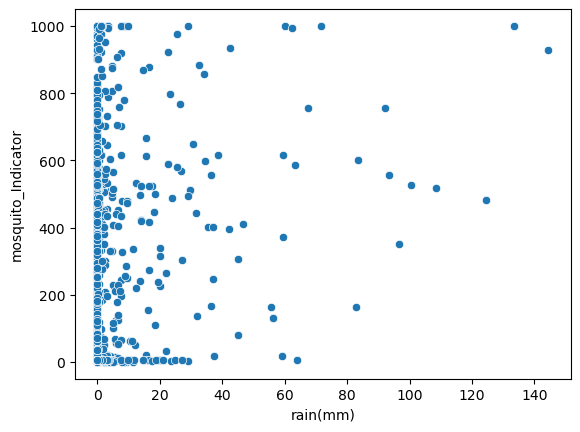

In [29]:
import seaborn as sns

sns.scatterplot(data = pre_m_df, x='rain(mm)',y='mosquito_Indicator')

<Axes: xlabel='mean_T(℃)', ylabel='mosquito_Indicator'>

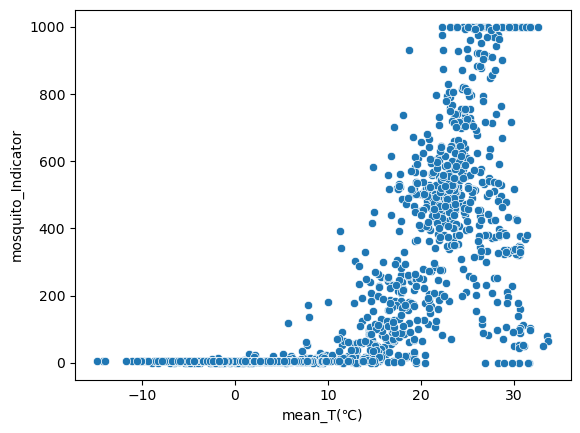

In [30]:
sns.scatterplot(data= pre_m_df, x='mean_T(℃)', y='mosquito_Indicator')

<Axes: xlabel='min_T(℃)', ylabel='mosquito_Indicator'>

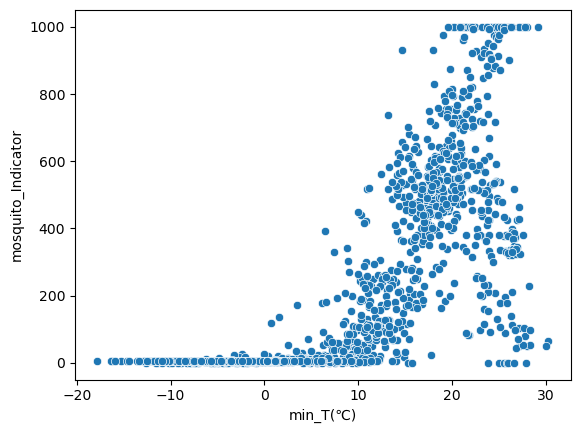

In [31]:
sns.scatterplot(data= pre_m_df, x='min_T(℃)', y='mosquito_Indicator')

<Axes: xlabel='max_T(℃)', ylabel='mosquito_Indicator'>

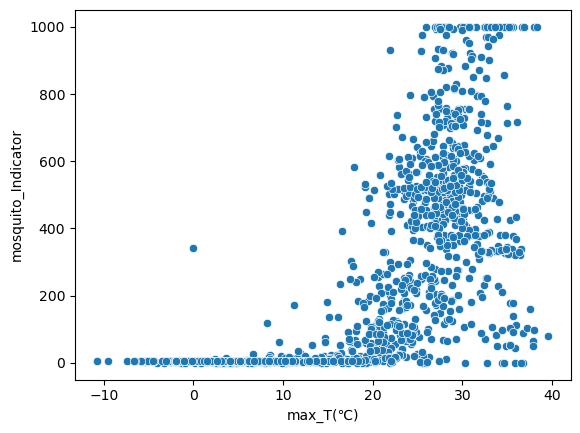

In [32]:
sns.scatterplot(data= pre_m_df, x='max_T(℃)', y='mosquito_Indicator')

In [34]:
pre_m_df.corr()['mosquito_Indicator'].sort_values(ascending=False)[1:]

min_T(℃)     0.743387
mean_T(℃)    0.728177
max_T(℃)     0.698576
rain(mm)     0.186194
Name: mosquito_Indicator, dtype: float64

<Axes: >

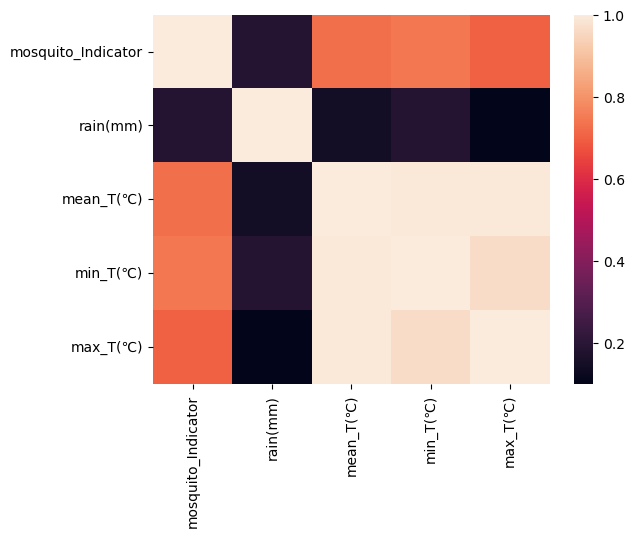

In [35]:
sns.heatmap(pre_m_df.corr())

In [36]:
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1290,5.5,0.0,-1.7,-4.6,2.6
1291,5.5,0.0,1.1,-3.6,6.1
1292,5.5,1.4,3.8,1.1,6.2
1293,5.5,0.4,2.7,-5.7,6.8


array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'mean_T(℃)'}>,
        <Axes: title={'center': 'min_T(℃)'}>],
       [<Axes: title={'center': 'max_T(℃)'}>, <Axes: >]], dtype=object)

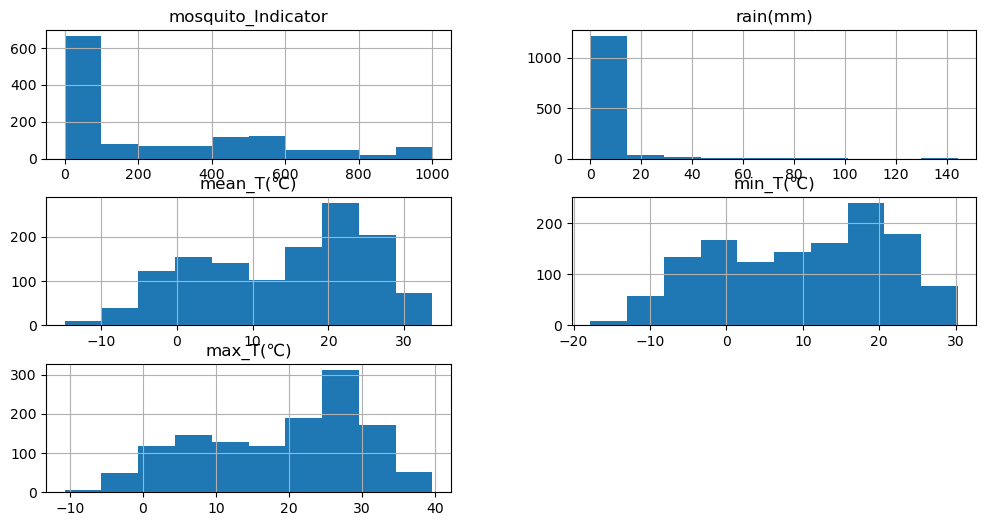

In [37]:
pre_m_df.hist(figsize=(12,6))

In [40]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              902.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:26:46   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1291   BIC:                                  1.740e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [42]:
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(℃)
2,200.659322,min_T(℃)
3,342.476613,max_T(℃)


In [44]:
pre_m_df['mean_T(℃)'] = pre_m_df['mean_T(℃)'] * 7.6037
pre_m_df['min_T(℃)'] = pre_m_df['min_T(℃)'] * 12.4657
pre_m_df['max_T(℃)'] = pre_m_df['max_T(℃)'] * 0.2099

In [45]:
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,142.94956,152.08154,5.45740
1,273.5,16.5,160.43807,205.68405,5.96116
2,304.0,27.0,98.08773,110.94473,3.69424
3,256.2,0.0,119.37809,127.15014,4.32394
4,243.8,7.5,143.70993,127.15014,5.64631
...,...,...,...,...,...
1290,5.5,0.0,-12.92629,-57.34222,0.54574
1291,5.5,0.0,8.36407,-44.87652,1.28039
1292,5.5,1.4,28.89406,13.71227,1.30138
1293,5.5,0.4,20.52999,-71.05449,1.42732


In [46]:
pre_m_df['temp'] = pre_m_df['mean_T(℃)'] + pre_m_df['min_T(℃)'] + pre_m_df['max_T(℃)']
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),temp
0,254.4,0.0,142.94956,152.08154,5.45740,300.48850
1,273.5,16.5,160.43807,205.68405,5.96116,372.08328
2,304.0,27.0,98.08773,110.94473,3.69424,212.72670
3,256.2,0.0,119.37809,127.15014,4.32394,250.85217
4,243.8,7.5,143.70993,127.15014,5.64631,276.50638
...,...,...,...,...,...,...
1290,5.5,0.0,-12.92629,-57.34222,0.54574,-69.72277
1291,5.5,0.0,8.36407,-44.87652,1.28039,-35.23206
1292,5.5,1.4,28.89406,13.71227,1.30138,43.90771
1293,5.5,0.4,20.52999,-71.05449,1.42732,-49.09718


In [48]:
pre_m_df = pre_m_df.drop(labels=['mean_T(℃)', 'min_T(℃)', 'max_T(℃)'], axis=1)
pre_m_df

,mosquito_Indicator,rain(mm),temp
0,254.4,0.0,300.48850
1,273.5,16.5,372.08328
2,304.0,27.0,212.72670
3,256.2,0.0,250.85217
4,243.8,7.5,276.50638
...,...,...,...
1290,5.5,0.0,-69.72277
1291,5.5,0.0,-35.23206
1292,5.5,1.4,43.90771
1293,5.5,0.4,-49.09718


In [49]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              1807.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:30:09   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1293   BIC:                                  1.739e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
get_vif(features)

,vif_score,feature
0,1.097587,rain(mm)
1,1.097587,temp


array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: >]], dtype=object)

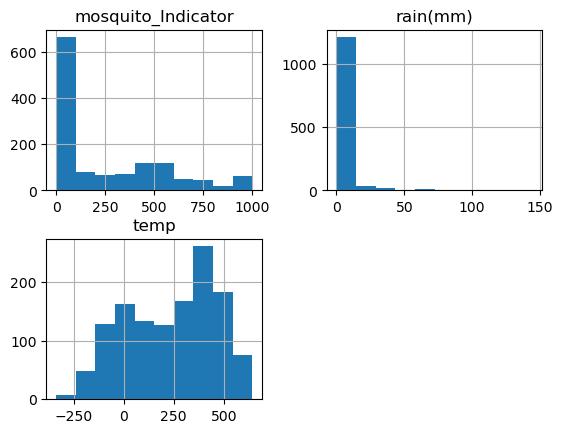

In [50]:
pre_m_df.hist()

<Axes: >

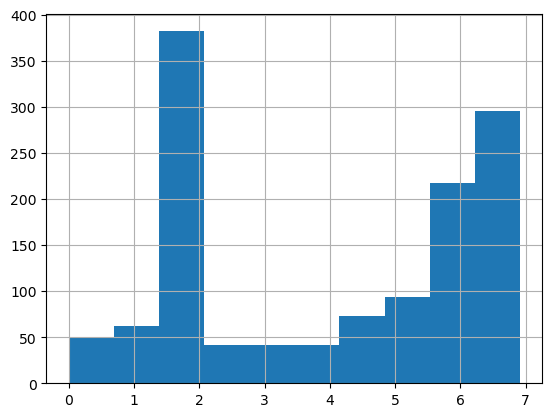

In [55]:
import numpy as np

np.log1p(pre_m_df.mosquito_Indicator).hist()

In [57]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])
pre_m_df['Target_yeo'] = result
pre_m_df

,mosquito_Indicator,rain(mm),temp,Target_yeo
0,254.4,0.0,300.48850,6.571413
1,273.5,16.5,372.08328,6.672078
2,304.0,27.0,212.72670,6.819922
3,256.2,0.0,250.85217,6.581196
4,243.8,7.5,276.50638,6.512448
...,...,...,...,...
1290,5.5,0.0,-69.72277,1.980530
1291,5.5,0.0,-35.23206,1.980530
1292,5.5,1.4,43.90771,1.980530
1293,5.5,0.4,-49.09718,1.980530


<Axes: >

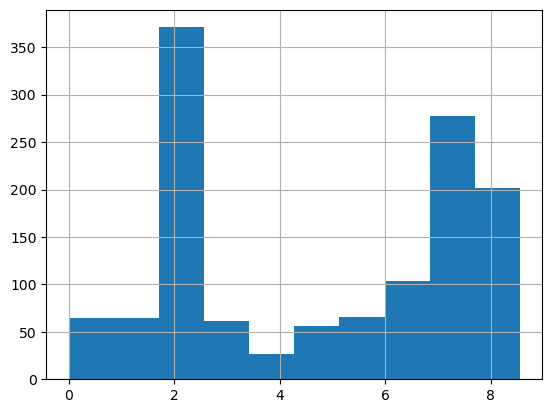

In [58]:
pre_m_df.Target_yeo.hist()

In [60]:
pre_m_df = pre_m_df.drop(labels=['mosquito_Indicator'], axis=1)
pre_m_df

,rain(mm),temp,Target_yeo
0,0.0,300.48850,6.571413
1,16.5,372.08328,6.672078
2,27.0,212.72670,6.819922
3,0.0,250.85217,6.581196
4,7.5,276.50638,6.512448
...,...,...,...
1290,0.0,-69.72277,1.980530
1291,0.0,-35.23206,1.980530
1292,1.4,43.90771,1.980530
1293,0.4,-49.09718,1.980530


In [61]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              3605.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:34:18   Log-Likelihood:                         -2816.3
No. Observations:                1295   AIC:                                      5637.
Df Residuals:                    1293   BIC:                                      5647.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
get_vif(features)

,vif_score,feature
0,1.097587,rain(mm)
1,1.097587,temp


In [67]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2)) #MSLE, RMSLE,))

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [68]:
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 2.3718, RMSE: 1.5401, R2: 0.6891


In [69]:
ptf.inverse_transform(prediction.reshape(-1, 1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[ 1.31186977e+02],
       [ 2.73592957e+02],
       [ 4.19502111e-01],
       [ 9.40146055e+01],
       [ 4.70444271e+02],
       [ 2.28946347e+01],
       [ 2.89179574e+02],
       [ 3.82648953e+01],
       [ 2.44254522e+02],
       [ 1.37439743e+01],
       [ 5.69815537e+02],
       [ 3.92979979e+02],
       [ 6.26985403e+01],
       [ 1.79828338e+01],
       [ 7.75180666e+00],
       [ 7.66381124e+01],
       [ 1.61896668e+00],
       [ 5.07260057e+02],
       [ 1.32259713e+02],
       [ 2.79204144e+01],
       [ 1.15448887e+02],
       [ 4.48272199e+01],
       [ 2.87297838e+00],
       [ 5.08403911e+02],
       [ 4.68398749e+01],
       [ 6.15042243e+01],
       [ 1.11218106e+02],
       [ 1.21490907e+01],
       [ 9.41331613e+00],
       [ 9.04078475e+01],
       [ 3.28648919e+02],
       [ 2.17626717e+02],
       [-1.32361616e-01],
       [ 2.39480294e+00],
       [ 5.59696843e+01],
       [ 1.29218324e+02],
       [ 1.34711989e+00],
       [ 2.56446481e+02],
       [ 6.6

In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [81]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 1.4016, RMSE: 1.1839, R2: 0.8163


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.4017, RMSE: 1.5497, R2: 0.6852
RandomForestRegressor
MSE: 1.8326, RMSE: 1.3537, R2: 0.7598
GradientBoostingRegressor
MSE: 1.4993, RMSE: 1.2245, R2: 0.8035
XGBRegressor
MSE: 1.7648, RMSE: 1.3285, R2: 0.7686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 1036, number of used features: 2
[LightGBM] [Info] Start training from score 4.716394
LGBMRegressor
MSE: 1.5128, RMSE: 1.2300, R2: 0.8017


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60], 'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50, 60],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='r2')

In [84]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.815393,71
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.816592,62
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.817997,50
3,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.818096,48
4,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.818100,47
...,...,...,...
95,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",0.818657,32
96,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",0.818406,40
97,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",0.819340,20
98,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",0.819308,24


In [85]:
rf_r = grid_rf_r.best_estimator_


In [87]:
prediction = rf_r.predict(X_test)

In [89]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2)) #MSLE, RMSLE,))

In [90]:
get_evaluation(y_test, prediction)

MSE: 1.3624, RMSE: 1.1672, MSLE: 0.0980, RMSLE: 0.3130, R2: 0.8214


array([[<Axes: title={'center': 'rain(mm)'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'Target_yeo'}>, <Axes: >]], dtype=object)

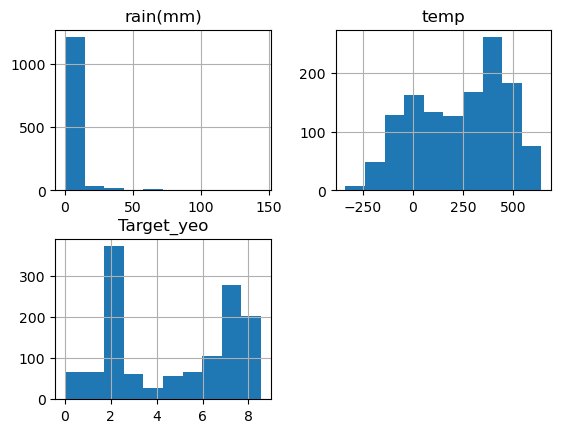

In [92]:
pre_m_df.hist()

In [124]:
from sklearn.preprocessing import StandardScaler
std_m_df = pre_m_df.copy()
scaler = StandardScaler()
for column in pre_m_df.columns:
    
     std_m_df[column] = scaler.fit_transform(pre_m_df[[column]])

In [125]:
pre_m_df

,rain(mm),temp,Target_yeo
0,0.0,300.48850,6.571413
1,16.5,372.08328,6.672078
2,27.0,212.72670,6.819922
3,0.0,250.85217,6.581196
4,7.5,276.50638,6.512448
...,...,...,...
1290,0.0,-69.72277,1.980530
1291,0.0,-35.23206,1.980530
1292,1.4,43.90771,1.980530
1293,0.4,-49.09718,1.980530


In [126]:
std_m_df

,rain(mm),temp,Target_yeo
0,-0.263041,0.289527,0.674862
1,1.078629,0.610236,0.711674
2,1.932419,-0.103603,0.765739
3,-0.263041,0.067180,0.678440
4,0.346809,0.182098,0.653299
...,...,...,...
1290,-0.263041,-1.368839,-1.003974
1291,-0.263041,-1.214337,-1.003974
1292,-0.149202,-0.859830,-1.003974
1293,-0.230515,-1.276446,-1.003974


In [127]:
condition = (std_m_df >= -1.96) & (std_m_df <= 1.96)

In [128]:
filtered_std_m_df = std_m_df[condition.all(axis=1)]

In [131]:
indices = filtered_std_m_df.index

In [135]:
pre_m_df = pre_m_df.iloc[indices].reset_index(drop=True)

In [136]:
pre_m_df

,rain(mm),temp,Target_yeo
0,0.0,300.48850,6.571413
1,16.5,372.08328,6.672078
2,27.0,212.72670,6.819922
3,0.0,250.85217,6.581196
4,7.5,276.50638,6.512448
...,...,...,...
1228,0.0,-69.72277,1.980530
1229,0.0,-35.23206,1.980530
1230,1.4,43.90771,1.980530
1231,0.4,-49.09718,1.980530


array([[<Axes: title={'center': 'rain(mm)'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'Target_yeo'}>, <Axes: >]], dtype=object)

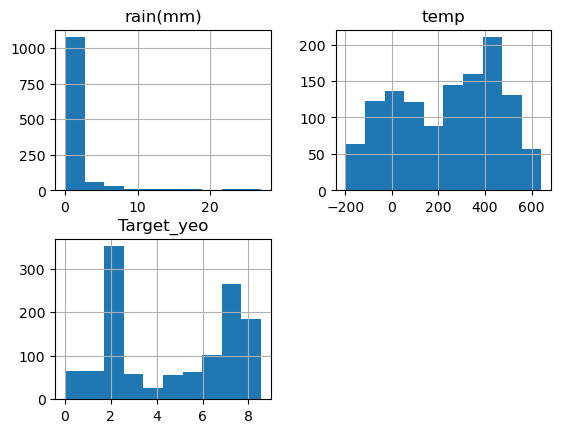

In [137]:
pre_m_df.hist()

In [138]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              3724.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:22:44   Log-Likelihood:                         -2630.9
No. Observations:                1233   AIC:                                      5266.
Df Residuals:                    1231   BIC:                                      5276.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.7863, RMSE: 1.6692, MSLE: 0.1931, RMSLE: 0.4395, R2: 0.6345
RandomForestRegressor
MSE: 2.2241, RMSE: 1.4913, MSLE: 0.1520, RMSLE: 0.3899, R2: 0.7082
GradientBoostingRegressor
MSE: 1.8525, RMSE: 1.3611, MSLE: 0.1334, RMSLE: 0.3653, R2: 0.7570
XGBRegressor
MSE: 2.1091, RMSE: 1.4523, MSLE: 0.1527, RMSLE: 0.3907, R2: 0.7233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 986, number of used features: 2
[LightGBM] [Info] Start training from score 4.697711
LGBMRegressor
MSE: 1.9514, RMSE: 1.3969, MSLE: 0.1423, RMSLE: 0.3772, R2: 0.7440


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60], 'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50, 60],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='r2')

In [141]:
rf_r = grid_rf_r.best_estimator_
prediction = rf_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.7787, RMSE: 1.3337, MSLE: 0.1304, RMSLE: 0.3612, R2: 0.7667
